In [1]:
import pandas as pd

In [2]:
pwd

'/content'

In [3]:
cd /content/drive/MyDrive/Colab Notebooks/powerjsv

/content/drive/MyDrive/Colab Notebooks/powerjsv


# Data Load

In [4]:
df=pd.read_csv('Gatun_Lake_Water_Level_Monthly_Mean.csv')
df

,DATE_LOG,GATUN_LAKE_LEVEL(FEET)
0,1965-01-31,86.363548
1,1965-02-28,85.753571
2,1965-03-31,84.521935
3,1965-04-30,83.380667
4,1965-05-31,82.677742
...,...,...
696,2024-01-31,81.437742
697,2024-02-29,80.986207
698,2024-03-31,80.518065
699,2024-04-30,80.302000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE_LOG                701 non-null    object 
 1   GATUN_LAKE_LEVEL(FEET)  701 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df['DATE_LOG']

0      1965-01-31
1      1965-02-28
2      1965-03-31
3      1965-04-30
4      1965-05-31
          ...    
696    2024-01-31
697    2024-02-29
698    2024-03-31
699    2024-04-30
700    2024-05-31
Name: DATE_LOG, Length: 701, dtype: object

In [7]:
# Convert 'DATE_LOG' to datetime format
df['DATE_LOG'] = pd.to_datetime(df['DATE_LOG'])

In [36]:
# Set 'DATE_LOG' as the index of the dataframe
df.set_index('DATE_LOG', inplace=True)

In [ ]:
import pandas as pd
import json
import requests
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

<Axes: xlabel='DATE_LOG'>

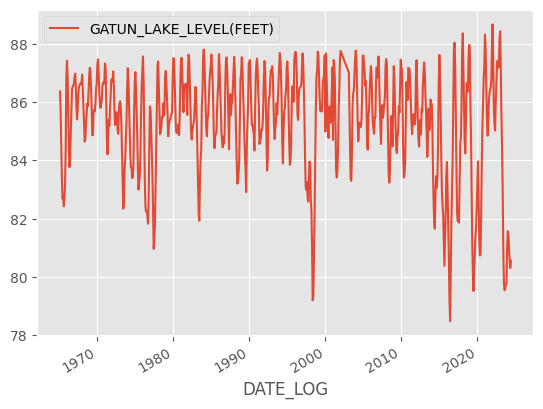

In [ ]:
plt.style.use('ggplot')
df.plot()

#### 12-MA

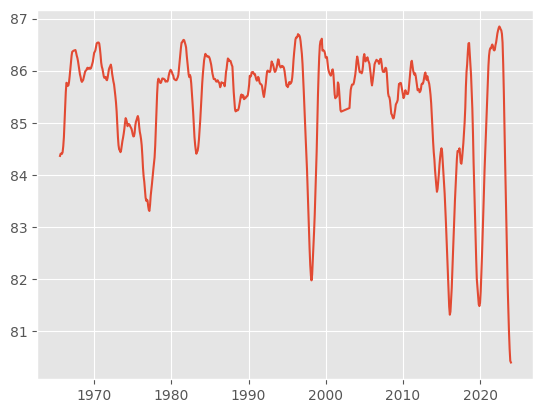

In [ ]:
plt.plot(ma_trend_12)

### Seasonal Decompose

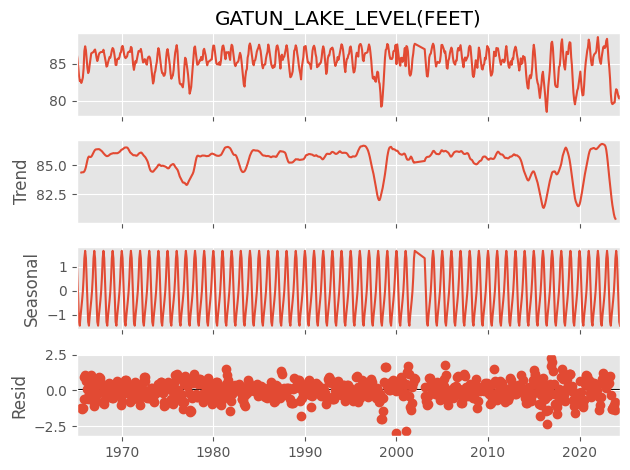

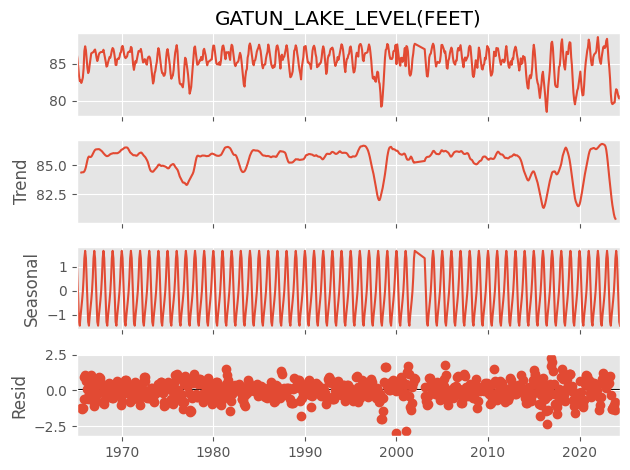

In [ ]:
result12 = seasonal_decompose(df['GATUN_LAKE_LEVEL(FEET)'], model = 'additive',period=12)
result12.plot()

In [ ]:
df_removed=df['GATUN_LAKE_LEVEL(FEET)']-result12.seasonal-result12.trend
df_removed=df_removed.dropna()

<Axes: xlabel='DATE_LOG'>

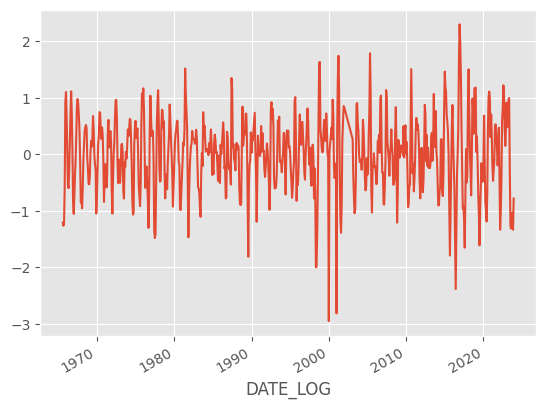

In [ ]:
df_removed.plot()

Deseasonalized

In [ ]:
df_deseasonalized=df['GATUN_LAKE_LEVEL(FEET)']-result12.seasonal
df_deseasonalized.dropna()

DATE_LOG
1965-01-31    84.992216
1965-02-28    85.233636
1965-03-31    84.968937
1965-04-30    84.691333
1965-05-31    84.147344
                ...    
2024-01-31    80.066410
2024-02-29    80.466272
2024-03-31    80.965066
2024-04-30    81.612666
2024-05-31    82.021102
Length: 701, dtype: float64

<Axes: xlabel='DATE_LOG'>

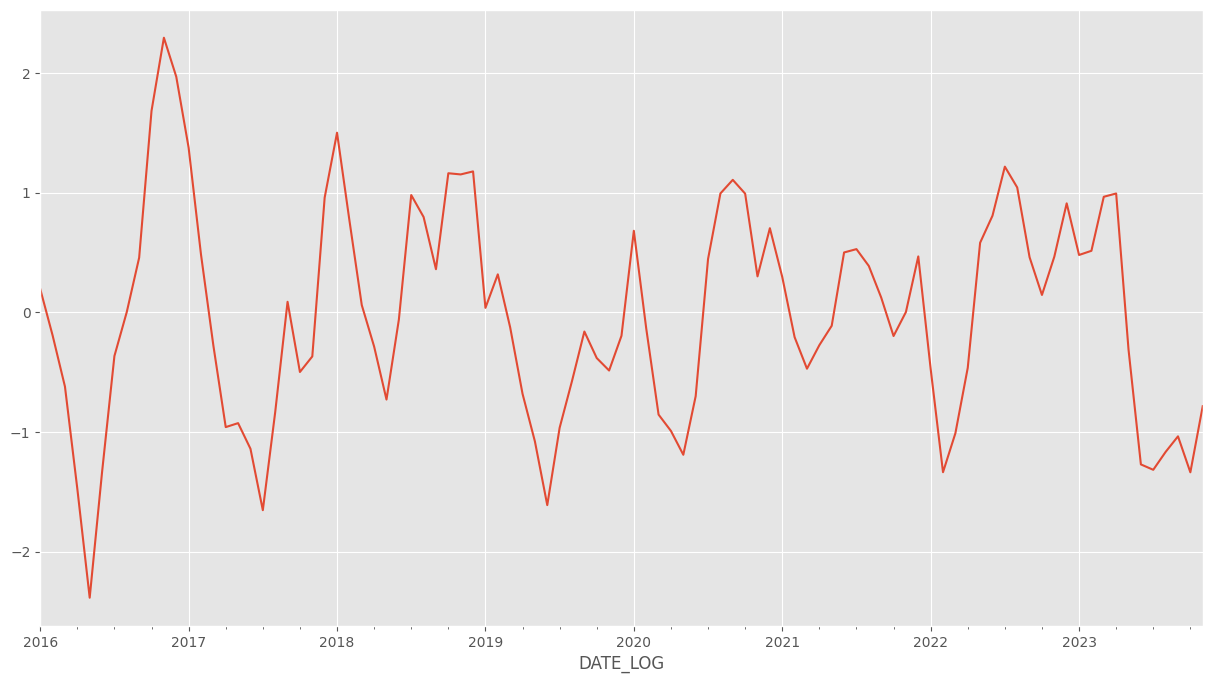

In [ ]:
plt.figure(figsize=(15, 8))
df_removed[df_removed.index >='2016-01-31'].plot()

<Axes: xlabel='DATE_LOG'>

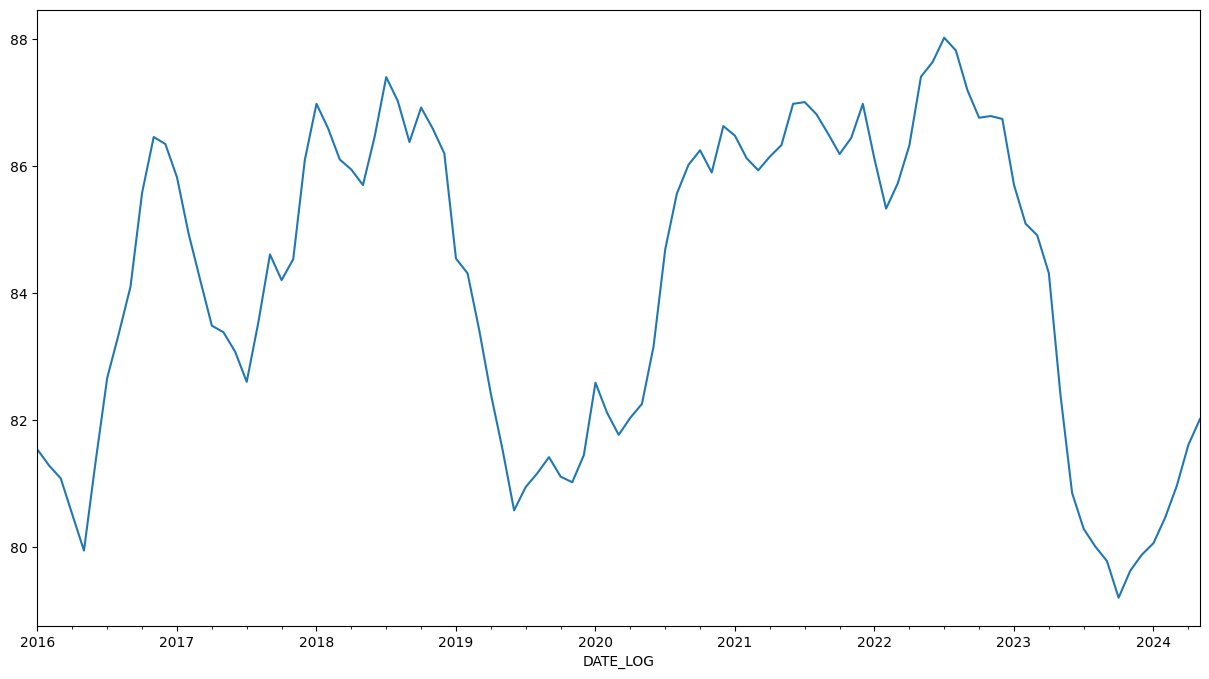

In [ ]:
plt.figure(figsize=(15, 8))
df_deseasonalized[df_deseasonalized.index >='2016-01-31'].plot()

# ETS Model

In [ ]:
from statsmodels.tsa.api import Holt

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing

In [55]:
after_index=['2024-06-30','2024-07-31','2024-08-31','2024-09-30','2024-10-31','2024-11-30','2024-12-31','2025-01-31','2025-02-28','2025-03-31','2025-04-30','2025-05-31']

In [44]:
fit_exp = ExponentialSmoothing(df.values, seasonal_periods=12, trend=None, seasonal='add').fit()
# last_date

In [48]:
fc_1=fit_exp.forecast(6)

In [45]:
df_tmp=df[df.index>='2020-01-31']

In [59]:
fc1_df=pd.DataFrame(fc_1,index=after_index[:6])

In [65]:
df_tmp=df[df.index>='2022-01-31']

In [73]:
fc1_df.index=pd.to_datetime(fc1_df.index)

In [68]:
df_tmp.index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31'],
              dtype='datetime64[ns]', name='DATE_LOG', freq=None)

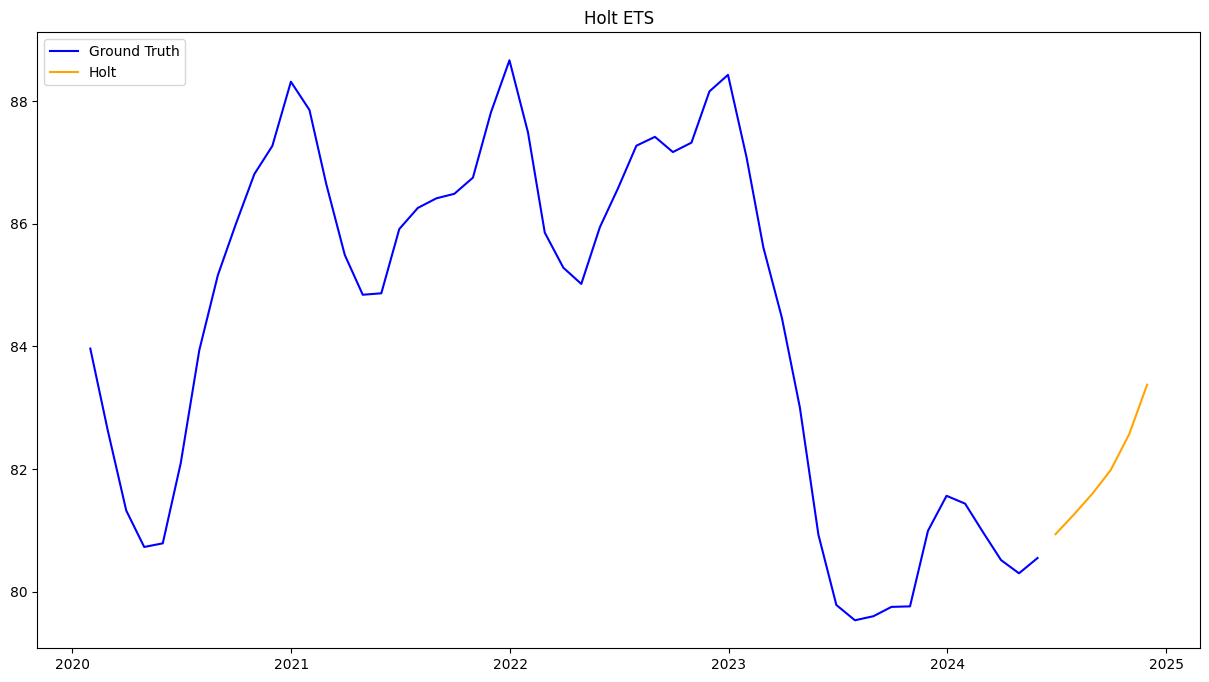

In [78]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df[df.index>='2020-01-01'].index, df[df.index>='2020-01-01'], label = 'Ground Truth',color='blue')
ax.plot(fc1_df.index, fc1_df.values, label = 'Holt',color='orange')
# ax.vlines(Timestamp('2024-05-31'), 70, 100, linestyle='--', color='r', label='Start of Forecast');

ax.legend(loc='upper left')
plt.title("Holt ETS")
plt.show()

In [ ]:
Holt2=Holt(df_deseasonalized, initialization_method="estimated",damped_trend=False).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
Holt3=Holt(df_deseasonalized, initialization_method="estimated",damped_trend=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
fcast2 = Holt2.forecast(12).rename(r"Additive trend")

In [ ]:
fcast2.index=pd.to_datetime(after_index)

In [ ]:
fcast3 = Holt3.forecast(12).rename(r"Additive damped trend")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
fcast3.index=pd.to_datetime(after_index)

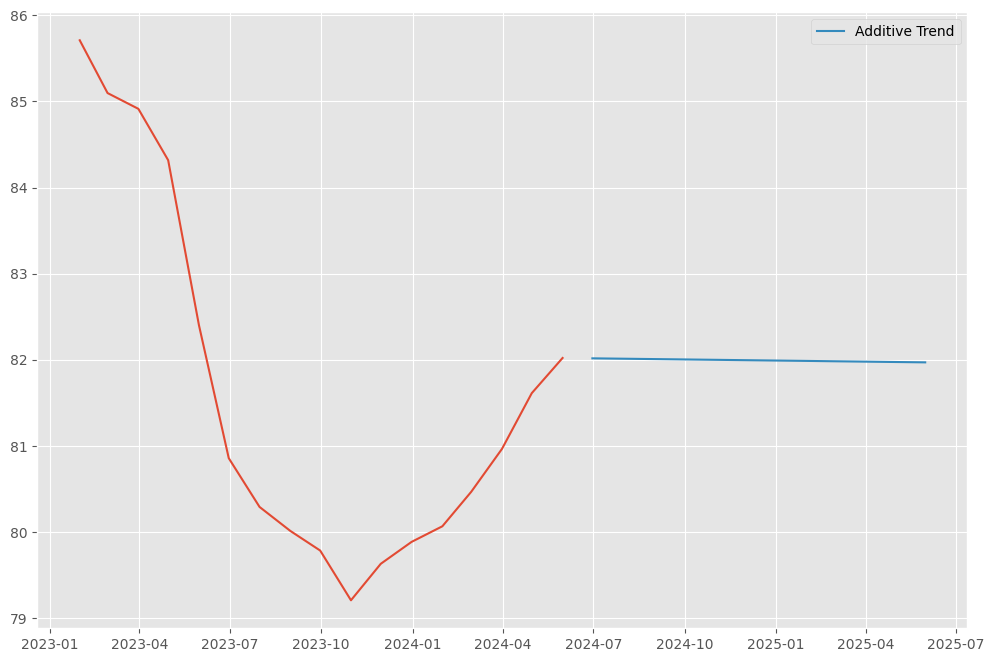

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df_deseasonalized[df_deseasonalized.index >='2023-01-31'])
# plt.plot(fcast3,label="Additive Damped Trend")
plt.plot(fcast2,label="Additive Trend")
plt.legend()
plt.show()

# ACF,PACF

In [ ]:
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

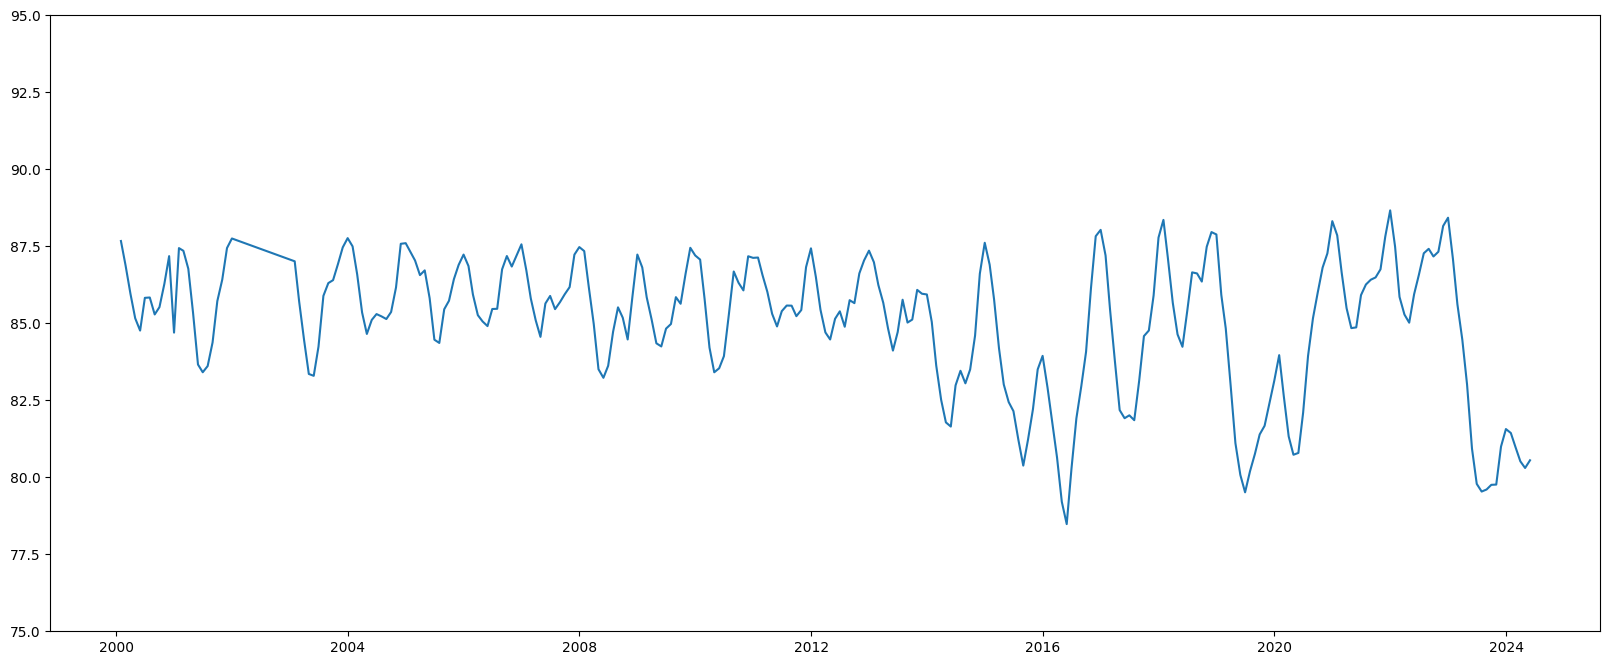

In [ ]:
plt.figure(figsize=(20,8))
plt.ylim(75,95)
plt.plot(df[df.index>='2000-01-31'])

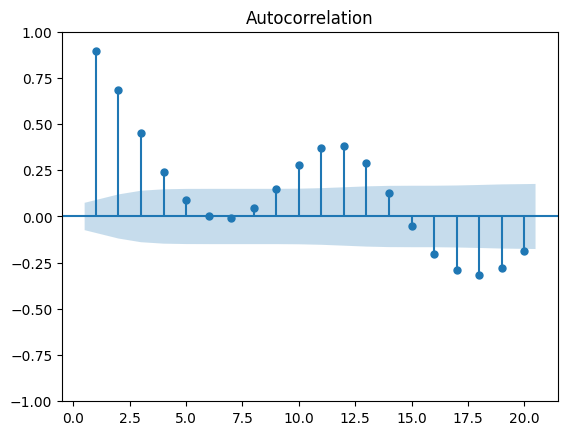

In [ ]:
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=20,zero=False);

In [ ]:
df_log=np.log(df)
df_log

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
1965-01-31,4.458566
1965-02-28,4.451478
1965-03-31,4.437011
1965-04-30,4.423416
1965-05-31,4.414950
...,...
2024-01-31,4.399839
2024-02-29,4.394279
2024-03-31,4.388482


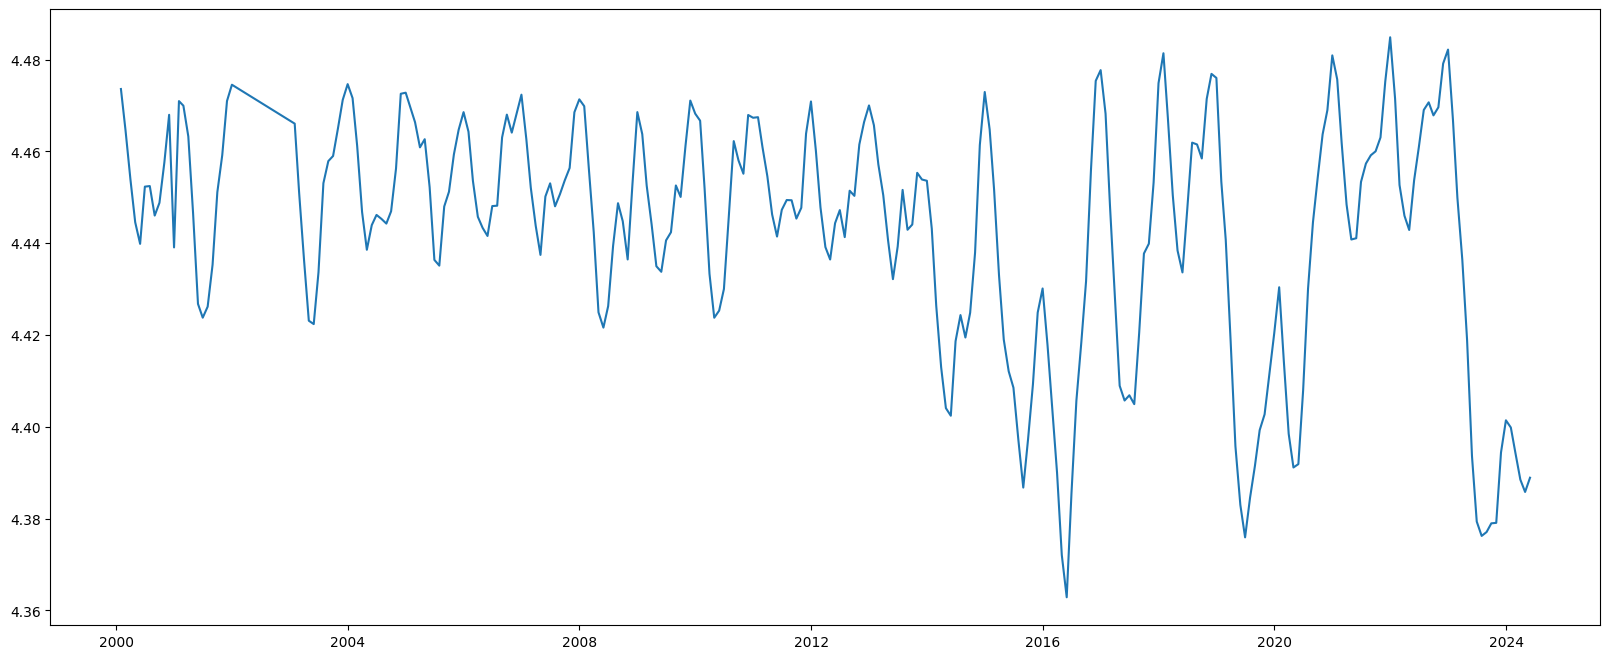

In [ ]:
df_log=np.log(df)
plt.figure(figsize=(20,8))
plt.plot(df_log[df_log.index>='2000-01-31'])

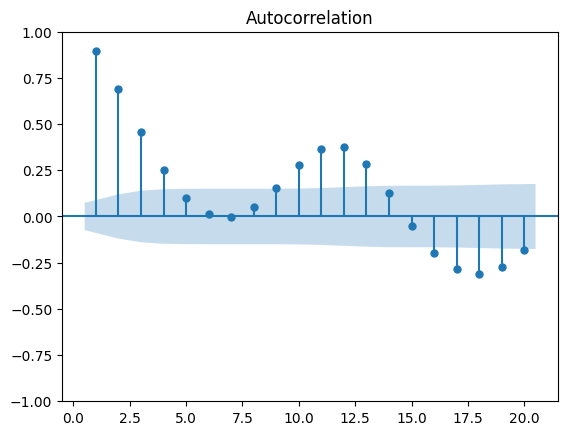

In [ ]:
sm.graphics.tsa.plot_acf(df_log.dropna().values.squeeze(), lags=20,zero=False);

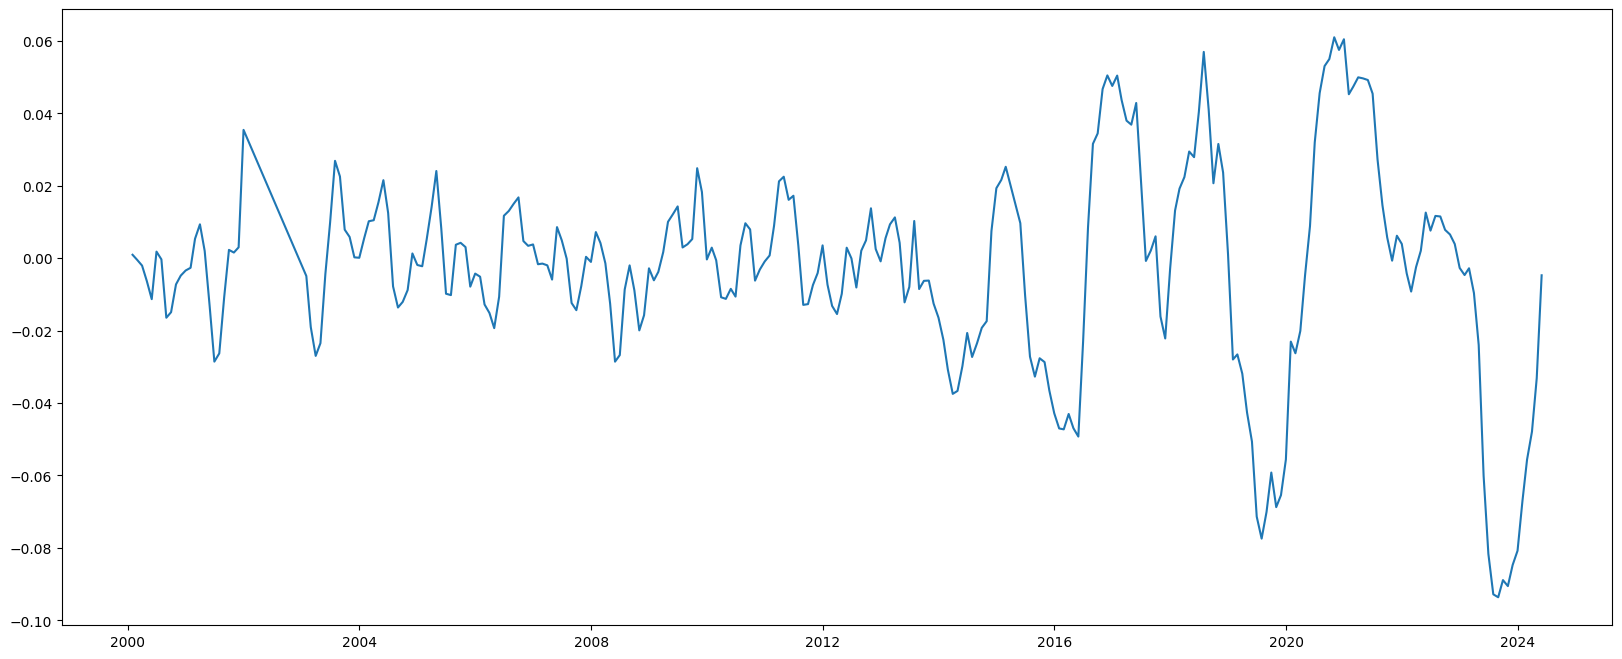

In [ ]:
df_transformed=df_log.diff(12) # seasonality 에 대해 차분
df_transformed.dropna()
plt.figure(figsize=(20,8))
plt.plot(df_transformed[df_transformed.index>='2000-01-31'])



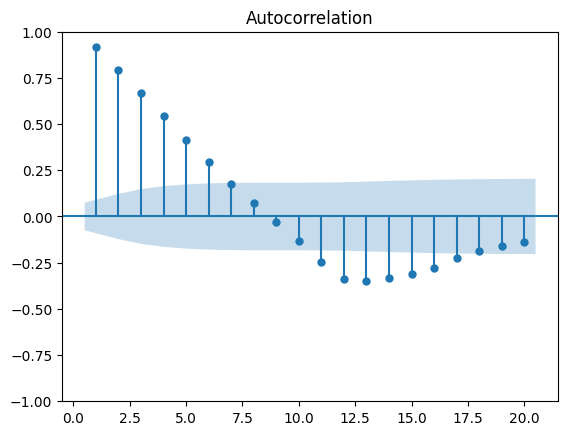

In [ ]:
sm.graphics.tsa.plot_acf(df_transformed.dropna().values.squeeze(), lags=20,zero=False);

In [ ]:
df_final=df_transformed.diff()
df_final=df_final.dropna()

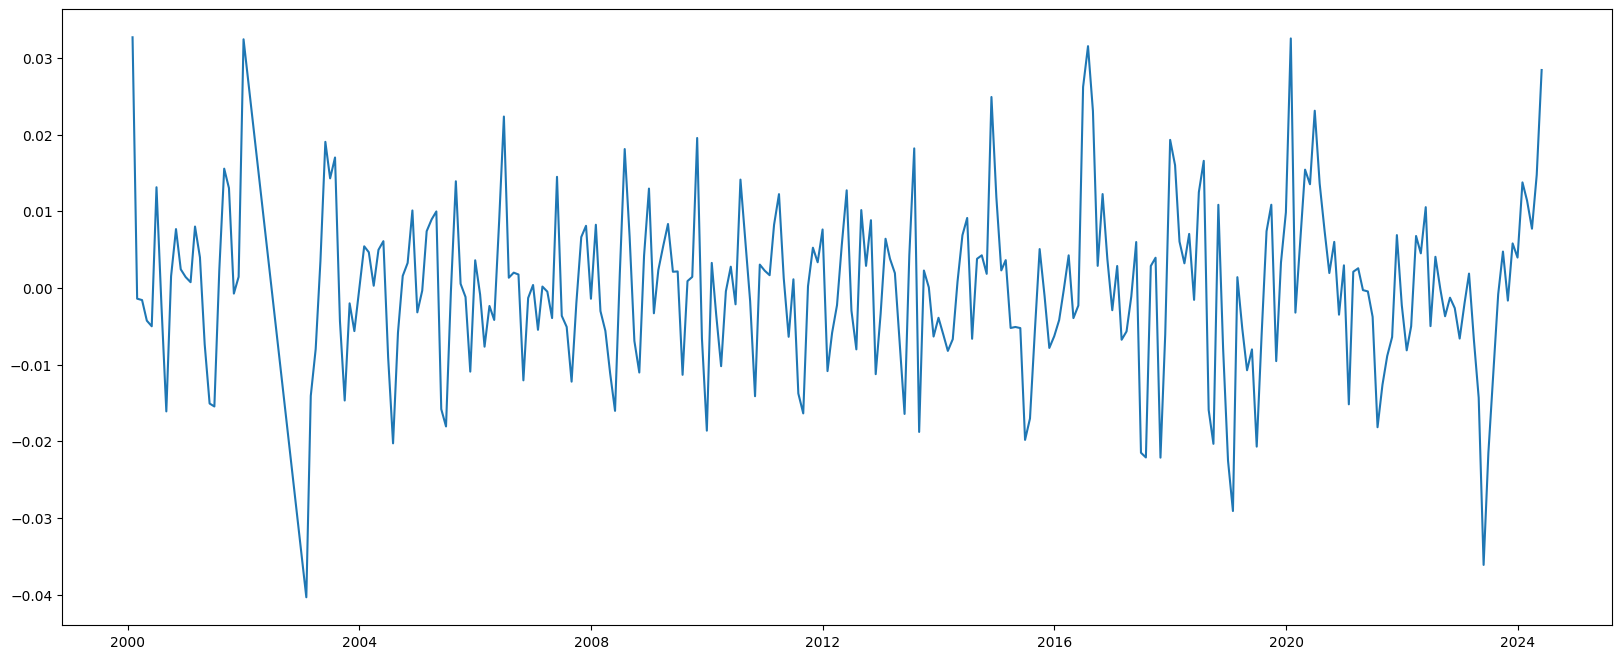

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_final[df_final.index>='2000-01-31'])

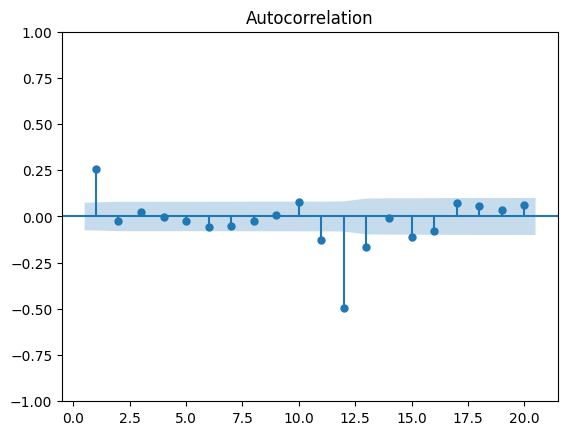

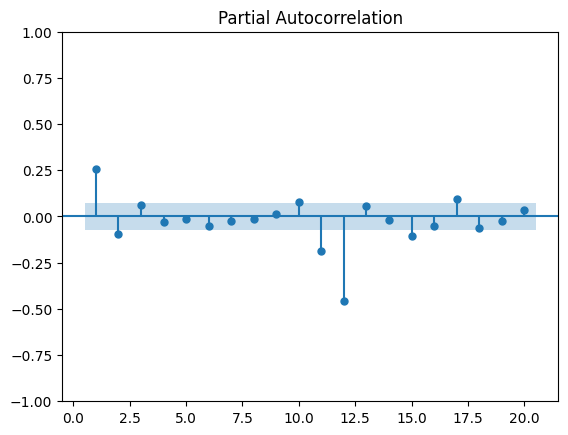

In [ ]:
sm.graphics.tsa.plot_acf(df_final.values.squeeze(), lags=20,zero=False);
sm.graphics.tsa.plot_pacf(df_final.values.squeeze(), lags=20,zero=False);

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Original
print("Original Data")
dftest = adfuller(df['GATUN_LAKE_LEVEL(FEET)'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

#df_log
print("Log Transformed")
dftest = adfuller(df_log.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

#log+differencing
print("Log+Differencing")
dftest = adfuller(df_final, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

Original Data
Test statistic = -5.631
P-value = 0.000
Critical values :
	1%: -3.4399324443722814 - The data is  stationary with 99% confidence
	5%: -2.865768564020576 - The data is  stationary with 95% confidence
	10%: -2.5690218258831052 - The data is  stationary with 90% confidence
Log Transformed
Test statistic = -5.587
P-value = 0.000
Critical values :
	1%: -3.4399324443722814 - The data is  stationary with 99% confidence
	5%: -2.865768564020576 - The data is  stationary with 95% confidence
	10%: -2.5690218258831052 - The data is  stationary with 90% confidence
Log+Differencing
Test statistic = -9.000
P-value = 0.000
Critical values :
	1%: -3.4401478069875613 - The data is  stationary with 99% confidence
	5%: -2.8658634456698464 - The data is  stationary with 95% confidence
	10%: -2.5690723769213633 - The data is  stationary with 90% confidence


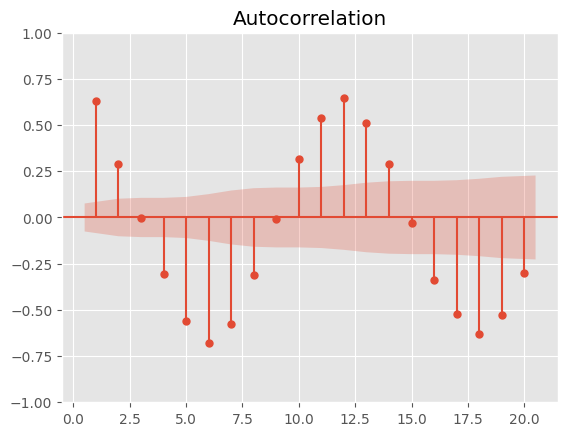

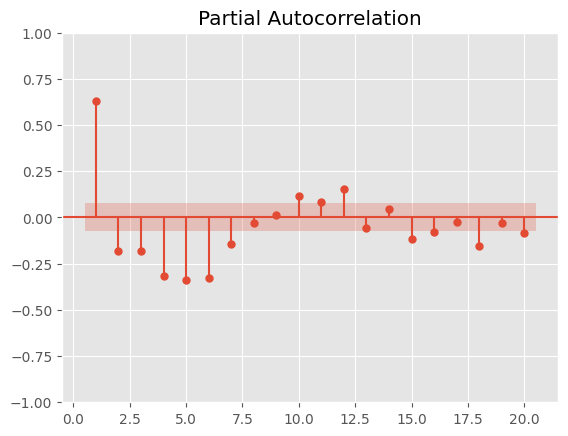

In [ ]:
sm.graphics.tsa.plot_acf(df_final.values.squeeze(), lags=20,zero=False);
sm.graphics.tsa.plot_pacf(df_final.values.squeeze(), lags=20,zero=False);

In [ ]:
len(df_final)

3032

In [ ]:
# 2,1,1 아니면 1,1,1

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
train_data=np.log(df['GATUN_LAKE_LEVEL(FEET)'][:560])
test_data=np.log(df['GATUN_LAKE_LEVEL(FEET)'][560:])
ARIMA_model=ARIMA(train_data,order=(1,1,1))
res=ARIMA_model.fit()
print(res.summary())

                                 SARIMAX Results                                  
Dep. Variable:     GATUN_LAKE_LEVEL(FEET)   No. Observations:                  560
Model:                     ARIMA(1, 1, 1)   Log Likelihood                1910.332
Date:                    Mon, 10 Jun 2024   AIC                          -3814.663
Time:                            05:27:29   BIC                          -3801.685
Sample:                                 0   HQIC                         -3809.595
                                    - 560                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3238      0.089      3.639      0.000       0.149       0.498
ma.L1          0.1583      0.078      2.030      0.042       0.005       0.311
sigma2      6.291e-0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
res.params

ar.L1     0.323849
ma.L1     0.158260
sigma2    0.000063
dtype: float64

In [ ]:
train_data

DATE_LOG
1965-01-31    4.458566
1965-02-28    4.451478
1965-03-31    4.437011
1965-04-30    4.423416
1965-05-31    4.414950
                ...   
2012-04-30    4.436444
2012-05-31    4.444354
2012-06-30    4.447209
2012-07-31    4.441326
2012-08-31    4.451432
Name: GATUN_LAKE_LEVEL(FEET), Length: 560, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'Predictions: Train Set')

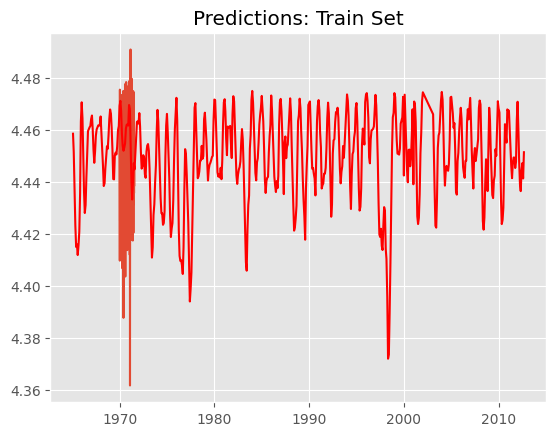

In [ ]:
plt.plot(res.predict(start=1,end=len(train_data),dynamic=False))
plt.plot(train_data,color='red')
plt.title("Predictions: Train Set")

Text(0.5, 1.0, 'Residual Plot')

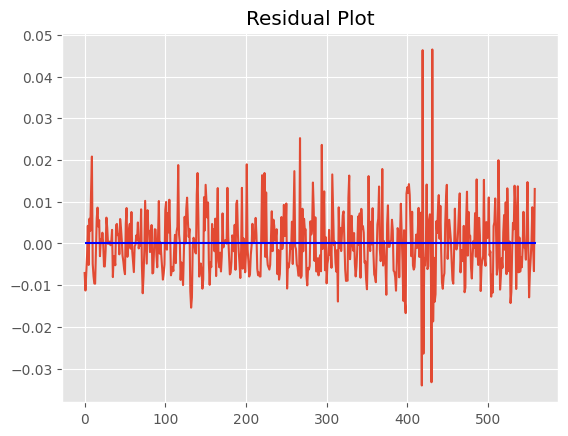

In [ ]:
plt.plot(res.resid.values[1:])
plt.hlines(0,xmin=0,xmax=len(res.resid.values[1:]),color='blue')
plt.title("Residual Plot")

In [ ]:
pred_ar.index=df.index[:560]

In [ ]:
train_21=np.log(df[df.index <='2021-12-31'])
test_21=np.log(df[df.index >'2021-12-31'])

In [ ]:
len(fcast21)

41

In [ ]:
train_21

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
1965-01-31,4.458566
1965-02-28,4.451478
1965-03-31,4.437011
1965-04-30,4.423416
1965-05-31,4.414950
...,...
2021-08-31,4.459159
2021-09-30,4.460013
2021-10-31,4.463049


In [ ]:
test_21=test_21[:12]

In [ ]:
fcast21=fcast21[:12]

In [ ]:
fcast21.index=test_21.index

In [ ]:
test_21

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
2022-01-31,4.471495
2022-02-28,4.452668
2022-03-31,4.445989
2022-04-30,4.442879
2022-05-31,4.453691
2022-06-30,4.460973
2022-07-31,4.469033
2022-08-31,4.470691
2022-09-30,4.467849


In [ ]:
test_21['GATUN_LAKE_LEVEL(FEET)']

DATE_LOG
2022-01-31    4.471495
2022-02-28    4.452668
2022-03-31    4.445989
2022-04-30    4.442879
2022-05-31    4.453691
2022-06-30    4.460973
2022-07-31    4.469033
2022-08-31    4.470691
2022-09-30    4.467849
2022-10-31    4.469609
2022-11-30    4.479131
2022-12-31    4.482186
Name: GATUN_LAKE_LEVEL(FEET), dtype: float64

In [ ]:
fcast21.values.tolist()

[4.482605082875527,
 4.47209995496232,
 4.460196711514112,
 4.451465520934668,
 4.449157513884033,
 4.456092719005857,
 4.463272171054676,
 4.46779306972029,
 4.471871421378733,
 4.4771878823147695,
 4.4846460894513305,
 4.491361294166311]

In [88]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_23['GATUN_LAKE_LEVEL(FEET)'], fcast23[:5].values.tolist())
rmse = np.sqrt(mse)

In [89]:
rmse

0.021639718182172925

In [87]:
fcast23

696    4.394291
697    4.381574
698    4.369876
699    4.359785
700    4.355333
701    4.358615
702    4.364021
703    4.367505
704    4.370346
705    4.374809
706    4.384261
707    4.390133
708    4.383192
709    4.370603
710    4.359310
711    4.349572
712    4.344724
dtype: float64

In [86]:
test_23

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
2024-01-31,4.399839
2024-02-29,4.394279
2024-03-31,4.388482
2024-04-30,4.385795
2024-05-31,4.388897


In [ ]:
rmse

0.009357668915779497

In [ ]:
after_index

['2024-06-30',
 '2024-07-31',
 '2024-08-31',
 '2024-09-30',
 '2024-10-31',
 '2024-11-30',
 '2024-12-31',
 '2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31']

In [81]:
train_23=np.log(df[df.index <='2023-12-31'])
test_23=np.log(df[df.index >'2023-12-31'])

In [ ]:
train_24=np.log(df[df.index <='2024-05-31'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'Predictions: Test Set')

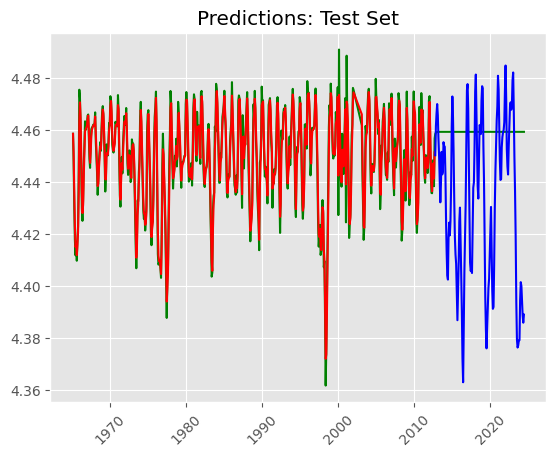

In [ ]:
pred_ar = res.predict(start=1,end=len(train_data)+len(test_data),dynamic=False)
pred_ar.index=df.index[:701]
plt.plot(pred_ar,color='green')
plt.plot(train_data,color='red')
plt.plot(test_data,color='blue')
plt.xticks(rotation=45)
plt.title("Predictions: Test Set")

ma

Text(0.5, 1.0, 'Predictions: Test Set')

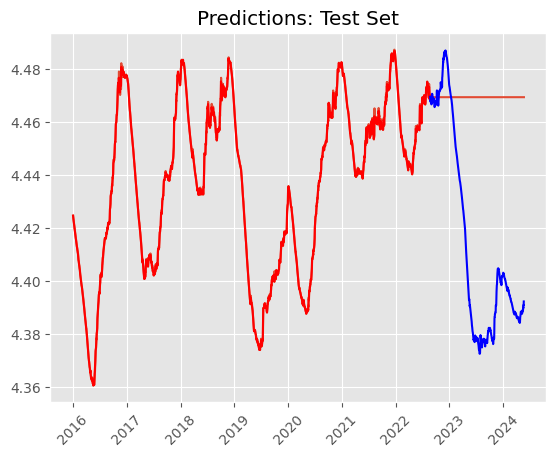

In [ ]:
pred_ma = res.predict(start=1,end=len(train_data)+len(test_data),dynamic=False)
plt.plot(pred_ma)
plt.plot(train_data,color='red')
plt.plot(test_data,color='blue')
plt.xticks(rotation=45)
plt.title("Predictions: Test Set")

# AutoARIMA

In [79]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:00


In [80]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
am_model_21=pm.auto_arima(train_21,sesonal=True,d=1,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4630.365, Time=2.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4335.929, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4643.742, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4599.726, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4337.918, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-4529.193, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-4703.319, Time=2.47 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-4749.994, Time=3.68 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-4755.759, Time=1.38 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-4597.435, Time=1.02 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-4734.197, Time=4.86 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=-4640.665, Time=3.10 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-4715.363, Time=1.96 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-4679.199, Time=1.08 sec
 ARIM

21 : Best model:  ARIMA(1,1,2)(2,0,2)[12]

In [82]:
am_model_23=pm.auto_arima(train_23,sesonal=True,d=1,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4901.600, Time=17.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4481.284, Time=0.29 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4807.299, Time=3.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4760.542, Time=3.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4483.232, Time=0.18 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-4719.982, Time=9.27 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-4778.600, Time=13.85 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-4778.968, Time=16.41 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-4724.579, Time=15.59 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-4654.144, Time=2.77 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-4743.970, Time=17.39 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-4838.800, Time=26.22 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-4881.244, Time=36.04 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-4895.503, Time=5.07 se

In [ ]:
am_model_24=pm.auto_arima(train_24,sesonal=True,d=1,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4825.639, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4517.679, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4843.858, Time=1.94 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4797.786, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4519.603, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-4726.442, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-4902.961, Time=4.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-4947.168, Time=5.98 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-4911.097, Time=1.29 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-4963.449, Time=5.48 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-4936.769, Time=3.91 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=-4906.121, Time=2.60 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=-4964.428, Time=9.03 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=-4940.824, Time=8.06 sec
 ARIM

In [ ]:
fcast21,b_21=am_model_21.predict(len(test_21)+12,return_conf_int=True)
fcast21,b_21

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(672    4.482605
 673    4.472100
 674    4.460197
 675    4.451466
 676    4.449158
 677    4.456093
 678    4.463272
 679    4.467793
 680    4.471871
 681    4.477188
 682    4.484646
 683    4.491361
 684    4.488736
 685    4.478944
 686    4.467971
 687    4.459941
 688    4.457822
 689    4.464200
 690    4.470804
 691    4.474964
 692    4.478717
 693    4.483608
 694    4.490468
 695    4.496645
 696    4.494236
 697    4.485240
 698    4.475158
 699    4.467781
 700    4.465838
 701    4.471705
 702    4.477780
 703    4.481608
 704    4.485062
 705    4.489563
 706    4.495873
 707    4.501555
 708    4.499345
 709    4.491080
 710    4.481818
 711    4.475041
 712    4.473259
 dtype: float64,
 array([[4.46907589, 4.49613428],
        [4.45040155, 4.49379836],
        [4.43210843, 4.488285  ],
        [4.41807345, 4.48485759],
        [4.41116881, 4.48714622],
        [4.41400031, 4.49818513],
        [4.41744062, 4.50910373],
        [4.41850488, 4.51708126],
        [4.419

In [83]:
fcast23,b_23=am_model_23.predict(len(test_23)+12,return_conf_int=True)
fcast23,b_23

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(696    4.394291
 697    4.381574
 698    4.369876
 699    4.359785
 700    4.355333
 701    4.358615
 702    4.364021
 703    4.367505
 704    4.370346
 705    4.374809
 706    4.384261
 707    4.390133
 708    4.383192
 709    4.370603
 710    4.359310
 711    4.349572
 712    4.344724
 dtype: float64,
 array([[4.38100556, 4.40757726],
        [4.36020726, 4.40294154],
        [4.34292823, 4.3968233 ],
        [4.3283689 , 4.39120145],
        [4.32043523, 4.39023005],
        [4.32090218, 4.3963282 ],
        [4.3237717 , 4.40427115],
        [4.32485558, 4.41015402],
        [4.32539404, 4.41529867],
        [4.32763184, 4.42198708],
        [4.33493883, 4.43358254],
        [4.33875268, 4.44151293],
        [4.32920867, 4.43717465],
        [4.31397293, 4.42723226],
        [4.30017047, 4.41845046],
        [4.28803765, 4.41110666],
        [4.280926  , 4.40852159]]))

In [ ]:
fcast24,b_24=am_model_24.predict(12,return_conf_int=True)
fcast24,b_24

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(701    4.393744
 702    4.399115
 703    4.402154
 704    4.404392
 705    4.408235
 706    4.416510
 707    4.421740
 708    4.415664
 709    4.404936
 710    4.395391
 711    4.387224
 712    4.382788
 dtype: float64,
 array([[4.38029743, 4.40719006],
        [4.37718465, 4.42104559],
        [4.37402335, 4.43028453],
        [4.37128148, 4.43750318],
        [4.37082976, 4.44564033],
        [4.37525866, 4.45776162],
        [4.37697081, 4.46650878],
        [4.3676343 , 4.46369409],
        [4.35385267, 4.45601893],
        [4.34142691, 4.44935468],
        [4.33052596, 4.44392288],
        [4.32348047, 4.44209464]]))

In [ ]:
after_index=['2024-06-30','2024-07-31','2024-08-31','2024-09-30','2024-10-31','2024-11-30','2024-12-31','2025-01-31','2025-02-28','2025-03-31','2025-04-30','2025-05-31']

In [ ]:
fcast24.index=after_index

In [ ]:
fcast24.index=pd.to_datetime(fcast24.index)

In [ ]:
fcast24.index

DatetimeIndex(['2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
fcast24

2024-06-30    4.393744
2024-07-31    4.399115
2024-08-31    4.402154
2024-09-30    4.404392
2024-10-31    4.408235
2024-11-30    4.416510
2024-12-31    4.421740
2025-01-31    4.415664
2025-02-28    4.404936
2025-03-31    4.395391
2025-04-30    4.387224
2025-05-31    4.382788
dtype: float64

In [ ]:
test_21.index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31'],
              dtype='datetime64[ns]', name='DATE_LOG', freq=None)

In [ ]:
tmp=test_21.index.strftime('%Y-%m-%d')
tmp

Index(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
       '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
       '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
       '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
       '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31'],
      dtype='object', name='DATE_LOG')

In [ ]:
pd.Series()

In [ ]:
t=np.concatenate([test_21.index,pd.to_datetime(after_index)])

In [ ]:
t

array(['2022-01-31T00:00:00.000000000', '2022-02-28T00:00:00.000000000',
       '2022-03-31T00:00:00.000000000', '2022-04-30T00:00:00.000000000',
       '2022-05-31T00:00:00.000000000', '2022-06-30T00:00:00.000000000',
       '2022-07-31T00:00:00.000000000', '2022-08-31T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000', '2022-10-31T00:00:00.000000000',
       '2022-11-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000',
       '2023-01-31T00:00:00.000000000', '2023-02-28T00:00:00.000000000',
       '2023-03-31T00:00:00.000000000', '2023-04-30T00:00:00.000000000',
       '2023-05-31T00:00:00.000000000', '2023-06-30T00:00:00.000000000',
       '2023-07-31T00:00:00.000000000', '2023-08-31T00:00:00.000000000',
       '2023-09-30T00:00:00.000000000', '2023-10-31T00:00:00.000000000',
       '2023-11-30T00:00:00.000000000', '2023-12-31T00:00:00.000000000',
       '2024-01-31T00:00:00.000000000', '2024-02-29T00:00:00.000000000',
       '2024-03-31T00:00:00.000000000', '2024-04-30

In [ ]:
fcast21.index=np.concatenate([test_21.index,pd.to_datetime(after_index)])

In [ ]:
fcast23.index=np.concatenate([test_23.index,pd.to_datetime(after_index)])

In [ ]:
fcast21.index=np.concatenate([test_21.index,pd.to_datetime(after_index)])
fcast23.index=np.concatenate([test_23.index,pd.to_datetime(after_index)])
fcast24.index=after_index

ValueError: Length mismatch: Expected axis has 41 elements, new values have 29 elements

In [ ]:
train_24.index

DatetimeIndex(['1965-01-31', '1965-02-28', '1965-03-31', '1965-04-30',
               '1965-05-31', '1965-06-30', '1965-07-31', '1965-08-31',
               '1965-09-30', '1965-10-31',
               ...
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
               '2024-04-30', '2024-05-31'],
              dtype='datetime64[ns]', name='DATE_LOG', length=701, freq=None)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from pandas import Timestamp

In [ ]:
b[:,1]

array([4.40693563, 4.42063728, 4.43018212, 4.43796096, 4.44650877,
       4.46007219, 4.46966763, 4.46691192, 4.4585837 , 4.45133162,
       4.44578505, 4.44498699])

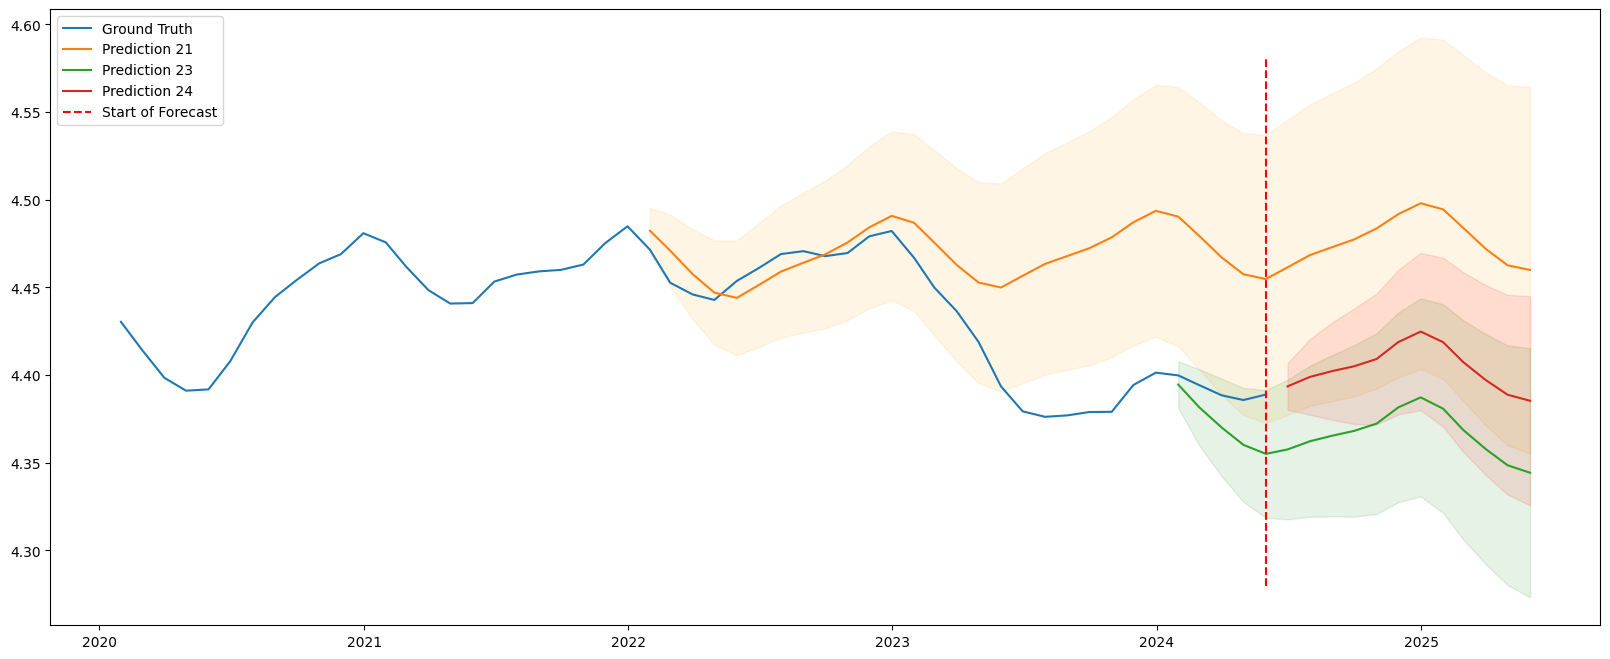

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df[df.index>='2020-01-01'].index, np.log(df[df.index>='2020-01-01']), label = 'Ground Truth')
ax.plot(fcast21.index, fcast21, label = 'Prediction 21')
ax.plot(fcast23.index, fcast23, label = 'Prediction 23')
ax.plot(fcast24.index, fcast24, label = 'Prediction 24')
ax.vlines(Timestamp('2024-05-31'), 4.28, 4.58, linestyle='--', color='r', label='Start of Forecast')
ax.fill_between(fcast21.index, b_21[:,0], b_21[:,1], color = 'orange', alpha = 0.1)
ax.fill_between(fcast23.index, b_23[:,0], b_23[:,1], color = 'green', alpha = 0.1)
ax.fill_between(fcast24.index, b_24[:,0], b_24[:,1], color = 'red', alpha = 0.1)

ax.legend(loc='upper left')
plt.show()

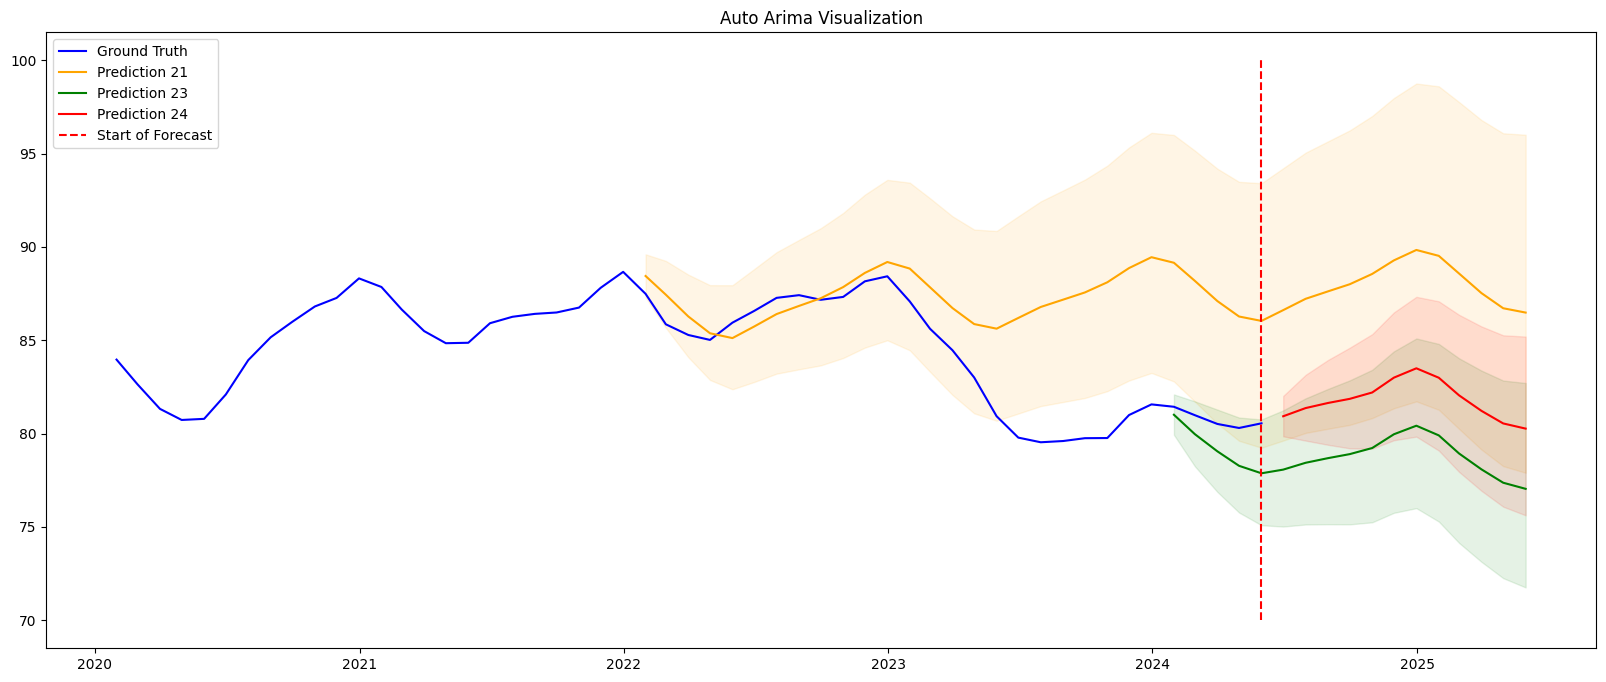

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df[df.index>='2020-01-01'].index, df[df.index>='2020-01-01'], label = 'Ground Truth',color='blue')
ax.plot(fcast21.index, np.exp(fcast21), label = 'Prediction 21',color='orange')
ax.plot(fcast23.index, np.exp(fcast23), label = 'Prediction 23',color='green')
ax.plot(fcast24.index, np.exp(fcast24), label = 'Prediction 24',color='red')
ax.vlines(Timestamp('2024-05-31'), 70, 100, linestyle='--', color='r', label='Start of Forecast');
ax.fill_between(fcast21.index, np.exp(b_21[:,0]), np.exp(b_21[:,1]), color = 'orange', alpha = 0.1)
ax.fill_between(fcast23.index, np.exp(b_23[:,0]), np.exp(b_23[:,1]), color = 'green', alpha = 0.1)
ax.fill_between(fcast24.index, np.exp(b_24[:,0]), np.exp(b_24[:,1]), color = 'red', alpha = 0.1)

ax.legend(loc='upper left')
plt.title("Auto Arima Visualization")
plt.show()

# ARIMA vs LightGBM

In [ ]:
gbm_21=pd.read_csv('LightGBM_21.csv',encoding='utf-8')
gbm_23=pd.read_csv('LightGBM_23.csv',encoding='utf-8')
gbm_24=pd.read_csv('LightGBM_24.csv',encoding='utf-8')

In [ ]:
gbm_21['DATE_LOG']=pd.to_datetime(gbm_21['DATE_LOG'])
gbm_23['DATE_LOG']=pd.to_datetime(gbm_23['DATE_LOG'])
gbm_24['DATE_LOG']=pd.to_datetime(gbm_24['DATE_LOG'])
gbm_21.set_index('DATE_LOG',inplace=True)
gbm_23.set_index('DATE_LOG',inplace=True)
gbm_24.set_index('DATE_LOG',inplace=True)

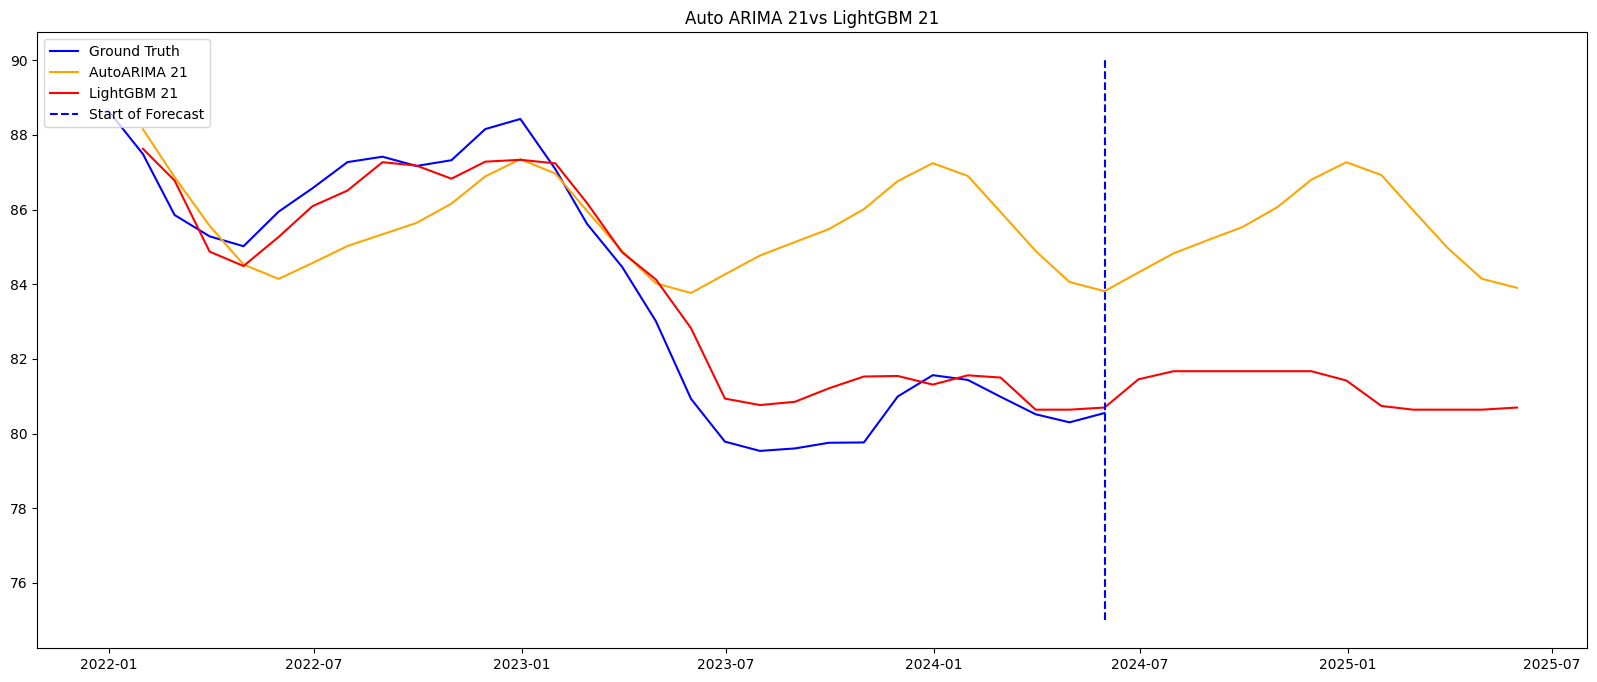

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df[df.index>='2021-12-31'].index, df[df.index>='2021-12-31'], label = 'Ground Truth',color='blue')
ax.plot(fcast21.index, np.exp(fcast21), label = 'AutoARIMA 21',color='orange')
ax.plot(gbm_21, label='LightGBM 21',color='red')
ax.vlines(Timestamp('2024-05-31'), 75, 90, linestyle='--', color='b', label='Start of Forecast');
plt.legend(loc='upper left')
plt.title("Auto ARIMA 21vs LightGBM 21")
plt.show()

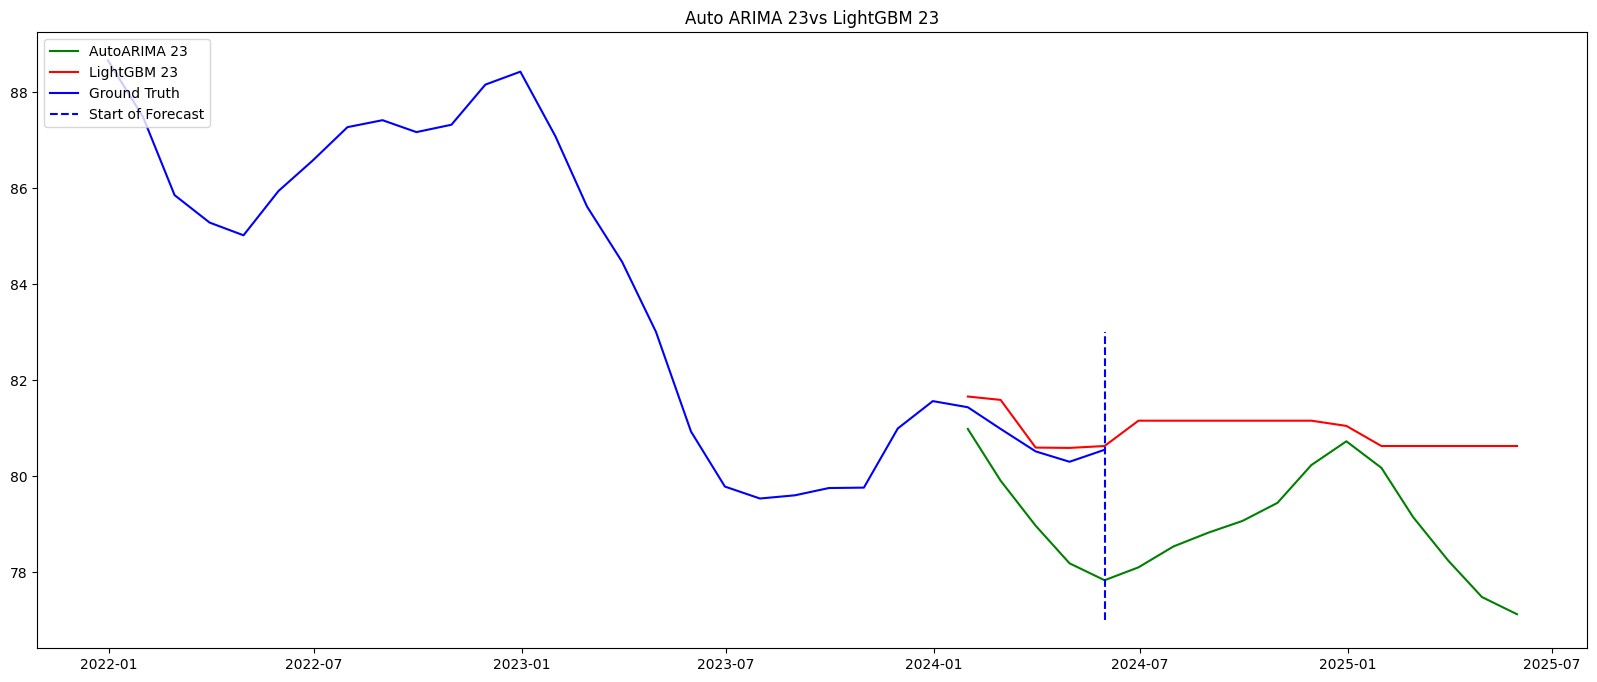

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(fcast23.index, np.exp(fcast23), label = 'AutoARIMA 23',color='green')
ax.plot(gbm_23, label='LightGBM 23',color='red')
ax.plot(df[df.index>='2021-12-31'].index, df[df.index>='2021-12-31'], label = 'Ground Truth',color='blue')
ax.vlines(Timestamp('2024-05-31'), 77, 83, linestyle='--', color='b', label='Start of Forecast');
plt.legend(loc='upper left')
plt.title("Auto ARIMA 23vs LightGBM 23")
plt.show()

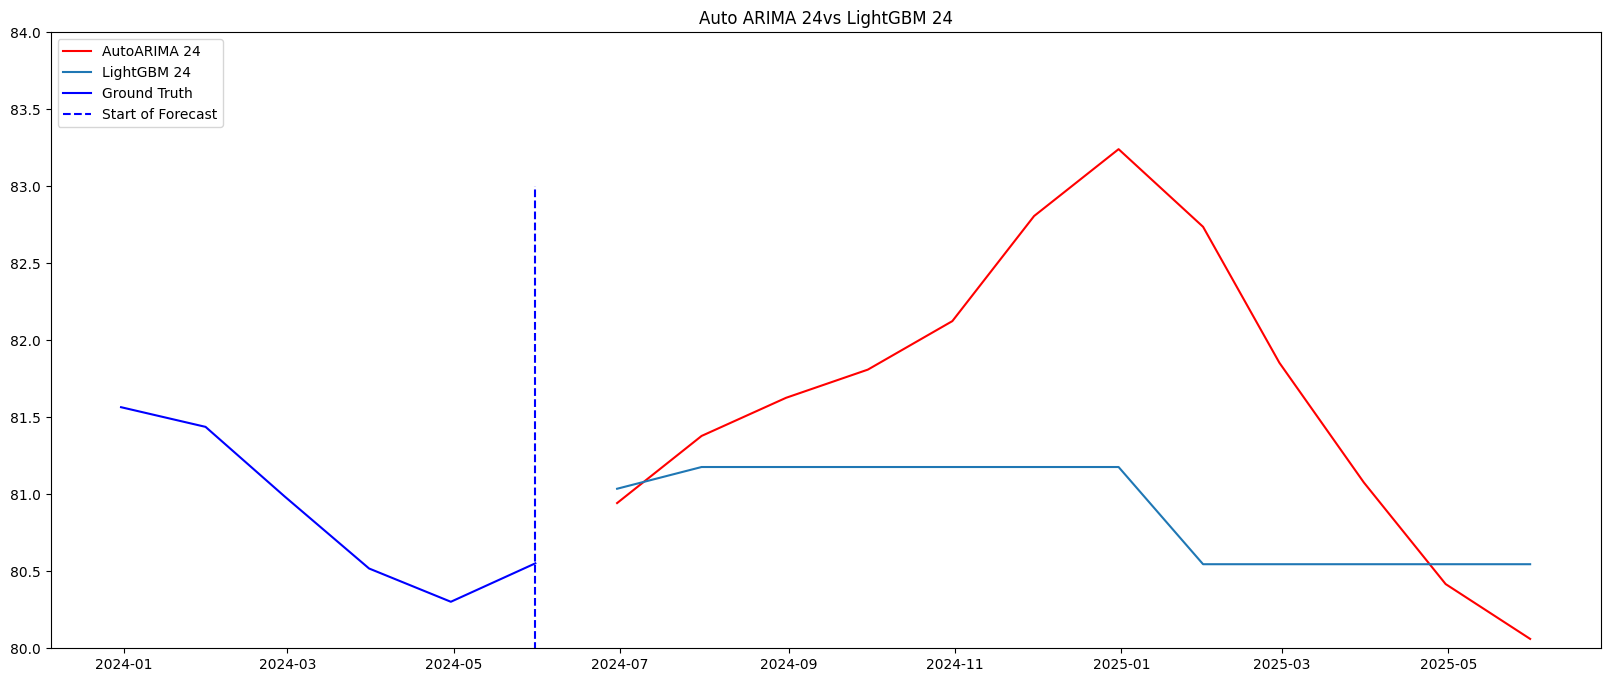

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(fcast24.index, np.exp(fcast24), label = 'AutoARIMA 24',color='red')
plt.ylim(80,84)
ax.plot(gbm_24[1:], label='LightGBM 24')
ax.plot(df[df.index>='2023-12-31'].index, df[df.index>='2023-12-31'], label = 'Ground Truth',color='blue')
plt.legend(loc='upper left')
ax.vlines(Timestamp('2024-05-31'), 77, 83, linestyle='--', color='b', label='Start of Forecast');
plt.title("Auto ARIMA 24vs LightGBM 24")
plt.legend(loc='upper left')
plt.show()

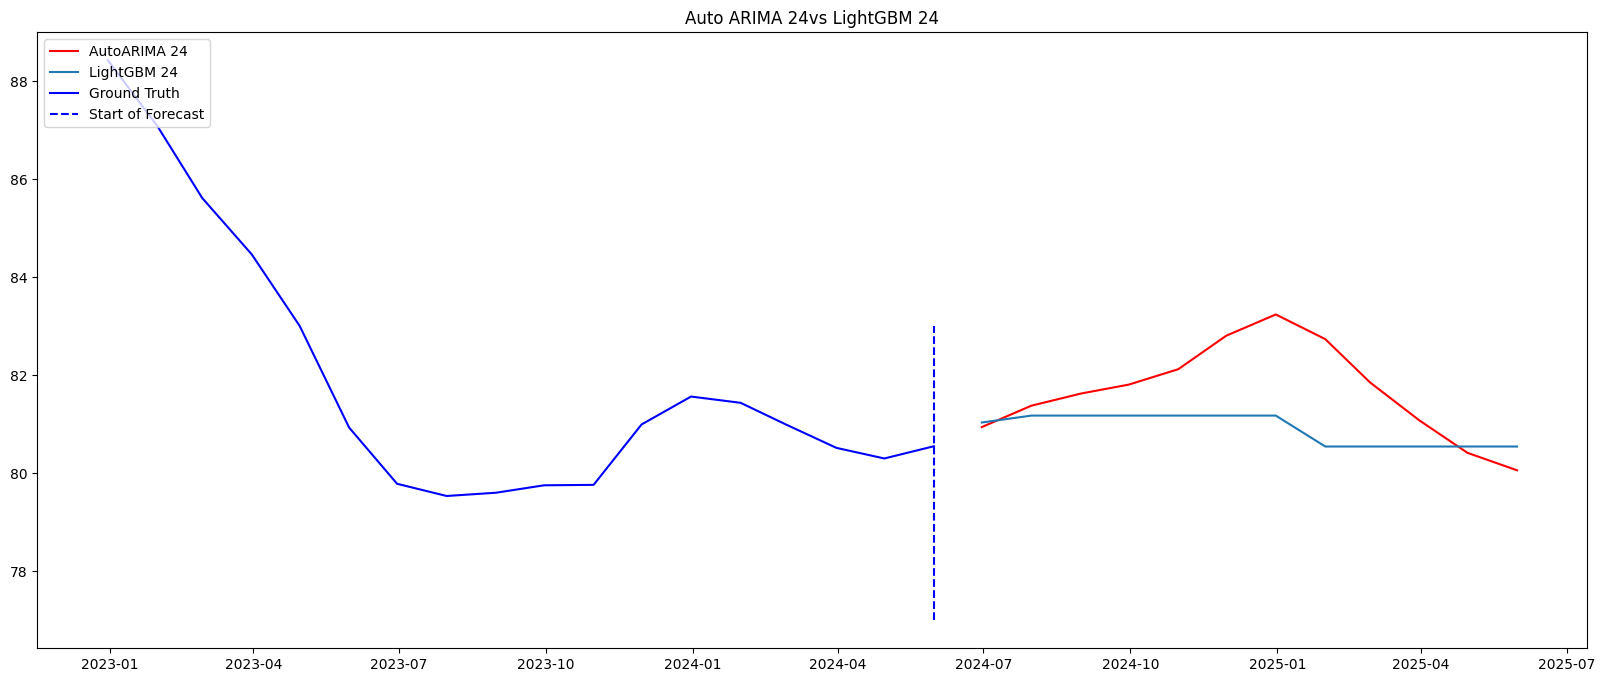

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(fcast24.index, np.exp(fcast24), label = 'AutoARIMA 24',color='red')

ax.plot(gbm_24[1:], label='LightGBM 24')
ax.plot(df[df.index>='2022-12-31'].index, df[df.index>='2022-12-31'], label = 'Ground Truth',color='blue')
plt.legend(loc='upper left')
ax.vlines(Timestamp('2024-05-31'), 77, 83, linestyle='--', color='b', label='Start of Forecast');
plt.title("Auto ARIMA 24vs LightGBM 24")
plt.legend(loc='upper left')
plt.show()